In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from scipy.special import binom
import random

# 1. Check probability 
N = 50 (total population)  
M = 20 (captured already)  
t = 12 (total captured this time)  
* Check (by simulation) that probability of m recaptured out of t is hypergeometrical

$$P(m|M,N) = \frac{\binom{M}{m}\binom{N-M}{t-m}}{\binom{N}{t}}$$  
*Probability of **m** recaptured given population size **N** and **M** previously captured*
$$\binom{n}{k} \equiv \frac{n!}{k!(n-k)!}$$

* Histogram of simulated vs theoretical

In [14]:
N = 50
M = 20
t = 12
size=15
rv = hypergeom(N, M, t)

In [15]:
rv.pmf(np.arange(size))

array([7.12466833e-04, 8.99958105e-03, 4.70228110e-02, 1.34350889e-01,
       2.33587340e-01, 2.59992866e-01, 1.89578131e-01, 9.09975030e-02,
       2.84367197e-02, 5.61712982e-03, 6.62018871e-04, 4.15058853e-05,
       1.03764713e-06, 0.00000000e+00, 0.00000000e+00])

In [16]:
population = M*[True] + (N-M)*[False]

In [17]:
samples = [np.sum(random.sample(population, t)) for i in range(10000)]

In [18]:
hypergeom.pmf(0, N, M, t)

0.0007124668334405122

In [19]:
def likelihood(population_size, captured_all, captured_now, recaptured_now):
    return np.nan_to_num(hypergeom.pmf(recaptured_now, population_size, captured_all, captured_now))


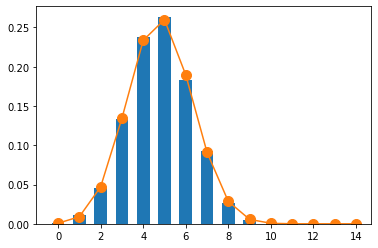

In [20]:
plt.hist(samples, bins=range(size), density=True, align="left", rwidth=0.6)
plt.plot(likelihood(N, M, t, range(size)), ".-", markersize=20)
plt.show()

# 2. 

In [21]:
true_population = M*[True] + (N-M)*[False]

0 44 44
2 48 90
6 44 128
5 51 174
8 50 216
9 51 258
9 45 294
17 58 335
21 60 374
14 45 405
17 44 432
25 45 452
21 57 488
24 55 519
33 60 546
30 50 566
21 48 593
27 47 613
33 46 626
30 52 648


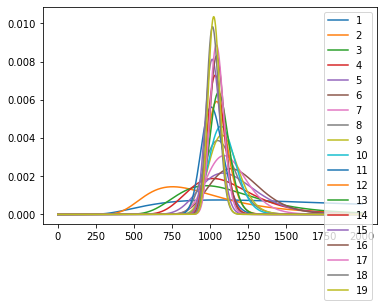

In [29]:
plt.figure()
N = 1000
M = [0]
space = np.arange(2000)
prior = np.ones_like(space)/space.shape[0]
estimation = [2*[np.mean(prior)]]
recaptured = []
for i in range(20):
    true_population = M[-1]*[True] + (N-M[-1])*[False]
    t = random.randint(40, 60)
    samples = random.sample(true_population, t)
    m = np.sum(samples)
    lkhood = likelihood(space, M[-1], t, m)
    prior = lkhood * prior / np.sum(lkhood * prior)    
    M.append(M[-1] + t - m)
    estimation.append([space[np.argmax(prior)], (space * prior).sum() / prior.sum()])
    recaptured.append(m)
    print(m, t, M[-1])
    if i == 0:
        continue
    # print("Estimation:", space[np.argmax(prior)])
    # estimation.append(space[np.argmax(prior)])
    plt.plot(space, prior, label=str(i))
estimation = np.array(estimation)
plt.legend()
plt.show()

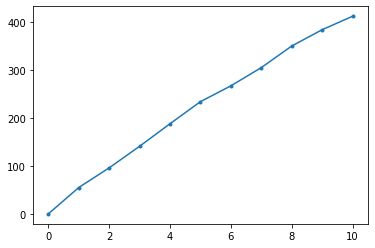

In [23]:
plt.figure()
plt.plot(range(len(M)), M, ".-")

In [24]:
np.diff(M)

array([55, 41, 45, 47, 46, 33, 38, 45, 34, 28])

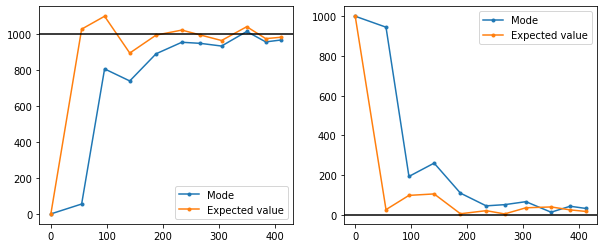

In [25]:
plt.figure(figsize=(10,4))
# plt.plot(M, np.abs(np.array(estimation)-N), ".-")
plt.subplot(121)
plt.plot(M, estimation[:, 0], ".-", label="Mode")
plt.plot(M, estimation[:, 1], ".-", label="Expected value")
plt.legend()
plt.axhline(N, c="k")
plt.subplot(122)
plt.plot(M, np.abs(np.array(estimation[:,0])-N), ".-", label="Mode")
plt.plot(M, np.abs(np.array(estimation[:,1])-N), ".-", label="Expected value")
plt.legend()
plt.axhline(0, c="k")

# Lincoln

0 51 51
1 50 100
4 60 156
7 47 196
18 56 234
9 44 269
14 50 305
10 41 336
23 57 370
18 46 398


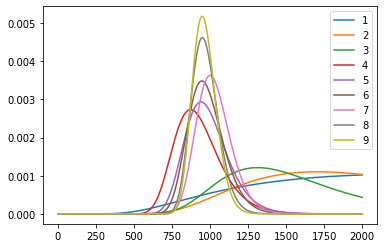

In [26]:
plt.figure()
N = 1000
M = [0]
space = np.arange(2000)
prior = np.ones_like(space)/space.shape[0]
estimation = [2*[np.mean(prior)]]
recaptured = []
for i in range(10):
    true_population = M[-1]*[True] + (N-M[-1])*[False]
    t = random.randint(40, 60)
    samples = random.sample(true_population, t)
    m = np.sum(samples)
    lkhood = likelihood(space, M[-1], t, m)
    prior = lkhood * prior / np.sum(lkhood * prior)
    M.append(M[-1] + t - m)
    estimation.append(
        [space[np.argmax(prior)], (space * prior).sum() / prior.sum()])
    recaptured.append(m)
    print(m, t, M[-1])
    if i == 0:
        continue
    # print("Estimation:", space[np.argmax(prior)])
    # estimation.append(space[np.argmax(prior)])
    plt.plot(space, prior, label=str(i))
estimation = np.array(estimation)
plt.legend()
plt.show()
